Daten einladen. Hierbei handelt es sich um die Original Rohdaten, unbehandelt.

In [2]:
import pandas as pd

# CSV-Datei einlesen – Kommas als Trennzeichen und als Tausenderzeichen, Dezimalpunkt
df = pd.read_csv("Data/Car_sales.csv", thousands=",", decimal=".")

# Die ersten 5 Zeilen anzeigen
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [4]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [5]:
df.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [6]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [7]:
df.rename(columns={
    'Sales_in_thousands': 'Sales',
    'Price_in_thousands': 'Price',
    '__year_resale_value': 'ResaleValue'
}, inplace=True)

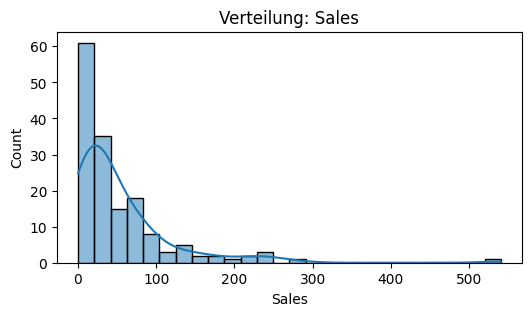

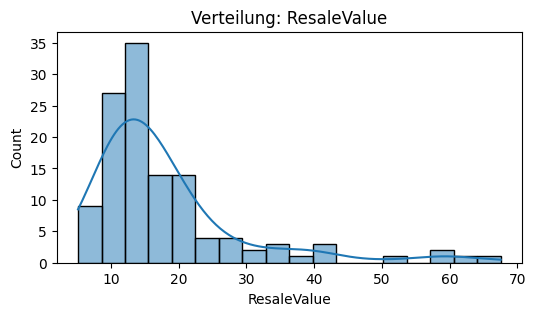

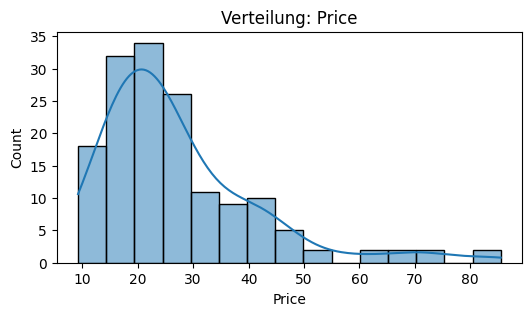

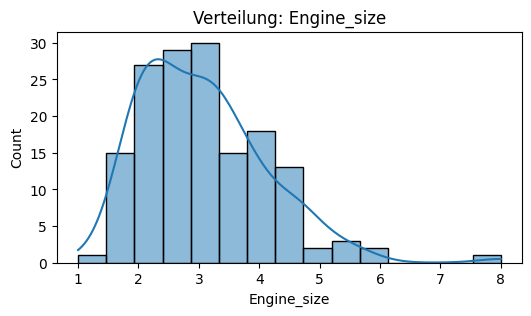

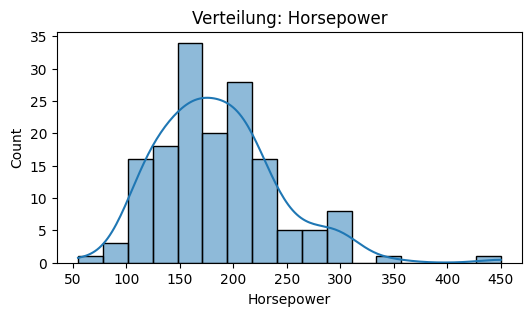

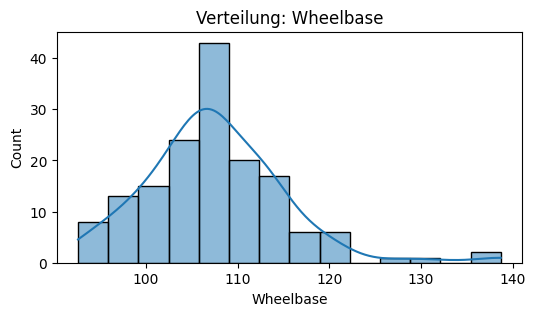

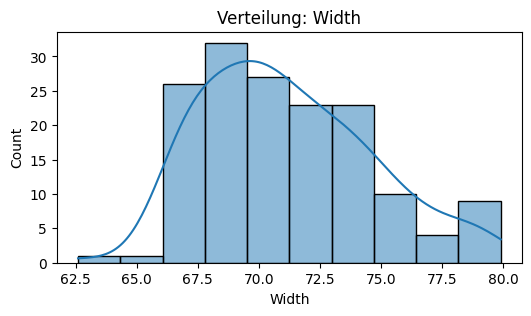

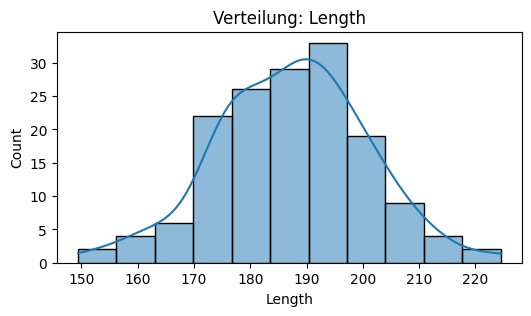

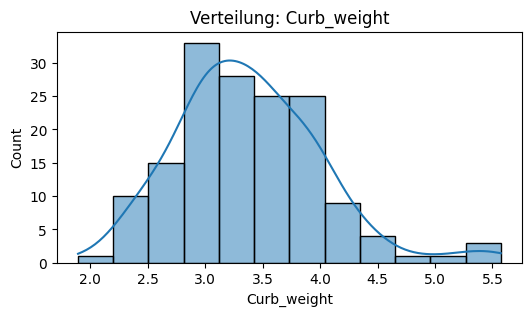

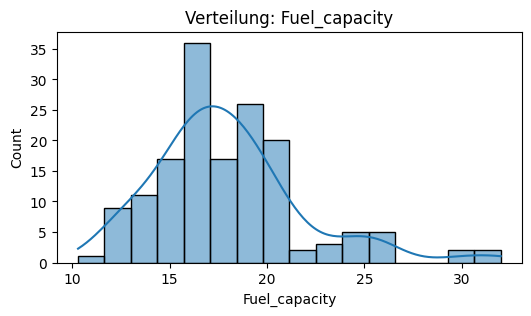

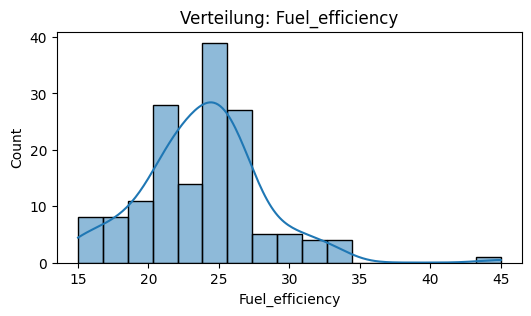

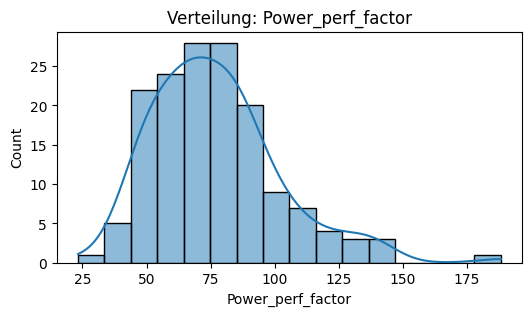

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Verteilung: {col}")
    plt.show()

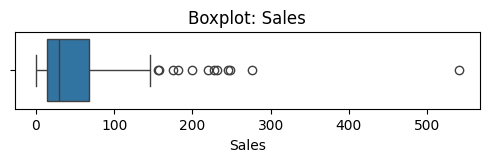

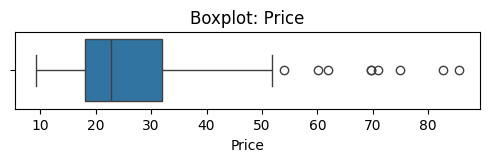

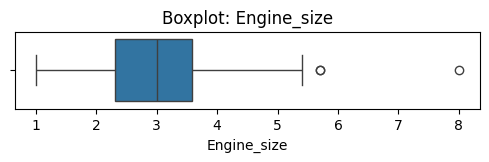

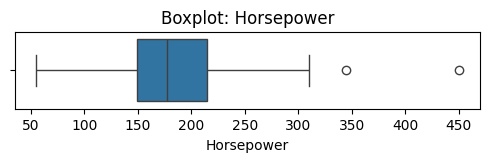

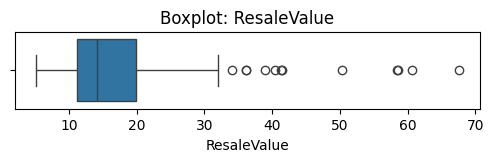

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot für ausgewählte Spalten
num_cols = ['Sales', 'Price', 'Engine_size', 'Horsepower', 'ResaleValue']
for col in num_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
    plt.show()

In [10]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"{col}:")
    print(df[col].value_counts())
    print("\n")

Manufacturer:
Manufacturer
Ford          11
Dodge         11
Chevrolet      9
Mercedes-B     9
Toyota         9
Chrysler       7
Mitsubishi     7
Nissan         7
Mercury        6
Oldsmobile     6
Lexus          6
Pontiac        6
Volvo          6
Volkswagen     6
Cadillac       5
Honda          5
Saturn         5
Plymouth       4
Buick          4
Acura          4
Audi           3
BMW            3
Lincoln        3
Porsche        3
Jeep           3
Hyundai        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: count, dtype: int64


Model:
Model
Neon       2
Integra    1
CL         1
TL         1
A4         1
          ..
V40        1
S70        1
V70        1
C70        1
S80        1
Name: count, Length: 156, dtype: int64


Vehicle_type:
Vehicle_type
Passenger    116
Car           41
Name: count, dtype: int64


Latest_Launch:
Latest_Launch
1/29/2012     2
1/4/2012      2
8/31/2011     2
5/6/2011      2
2/23/2012     2
             ..
12/4/2012     1
7/7/2011

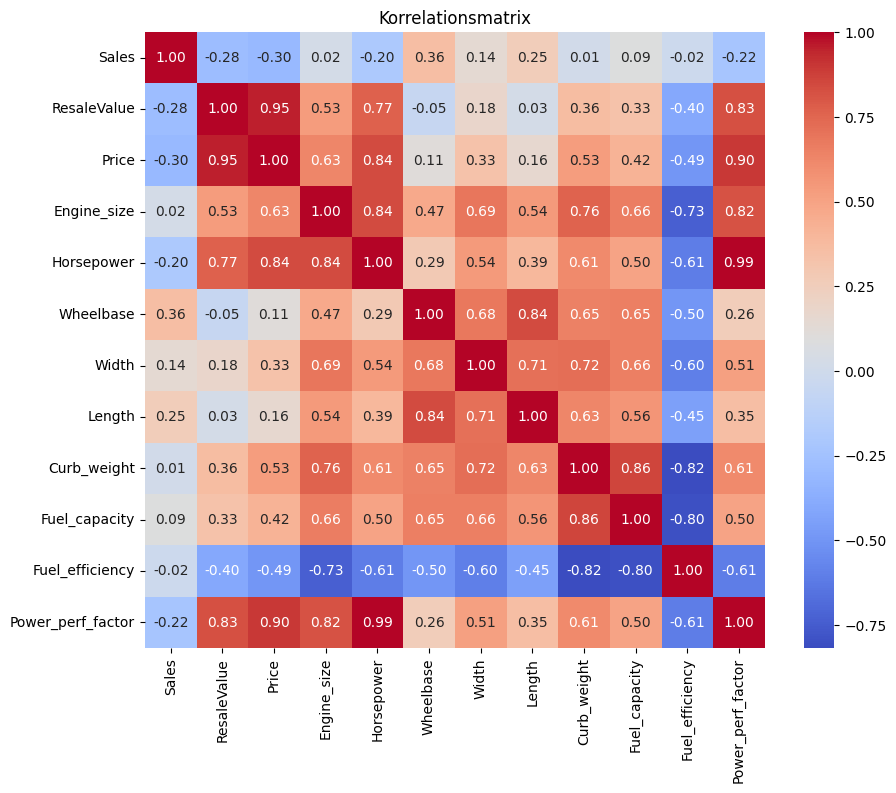

In [11]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korrelationsmatrix')
plt.show()

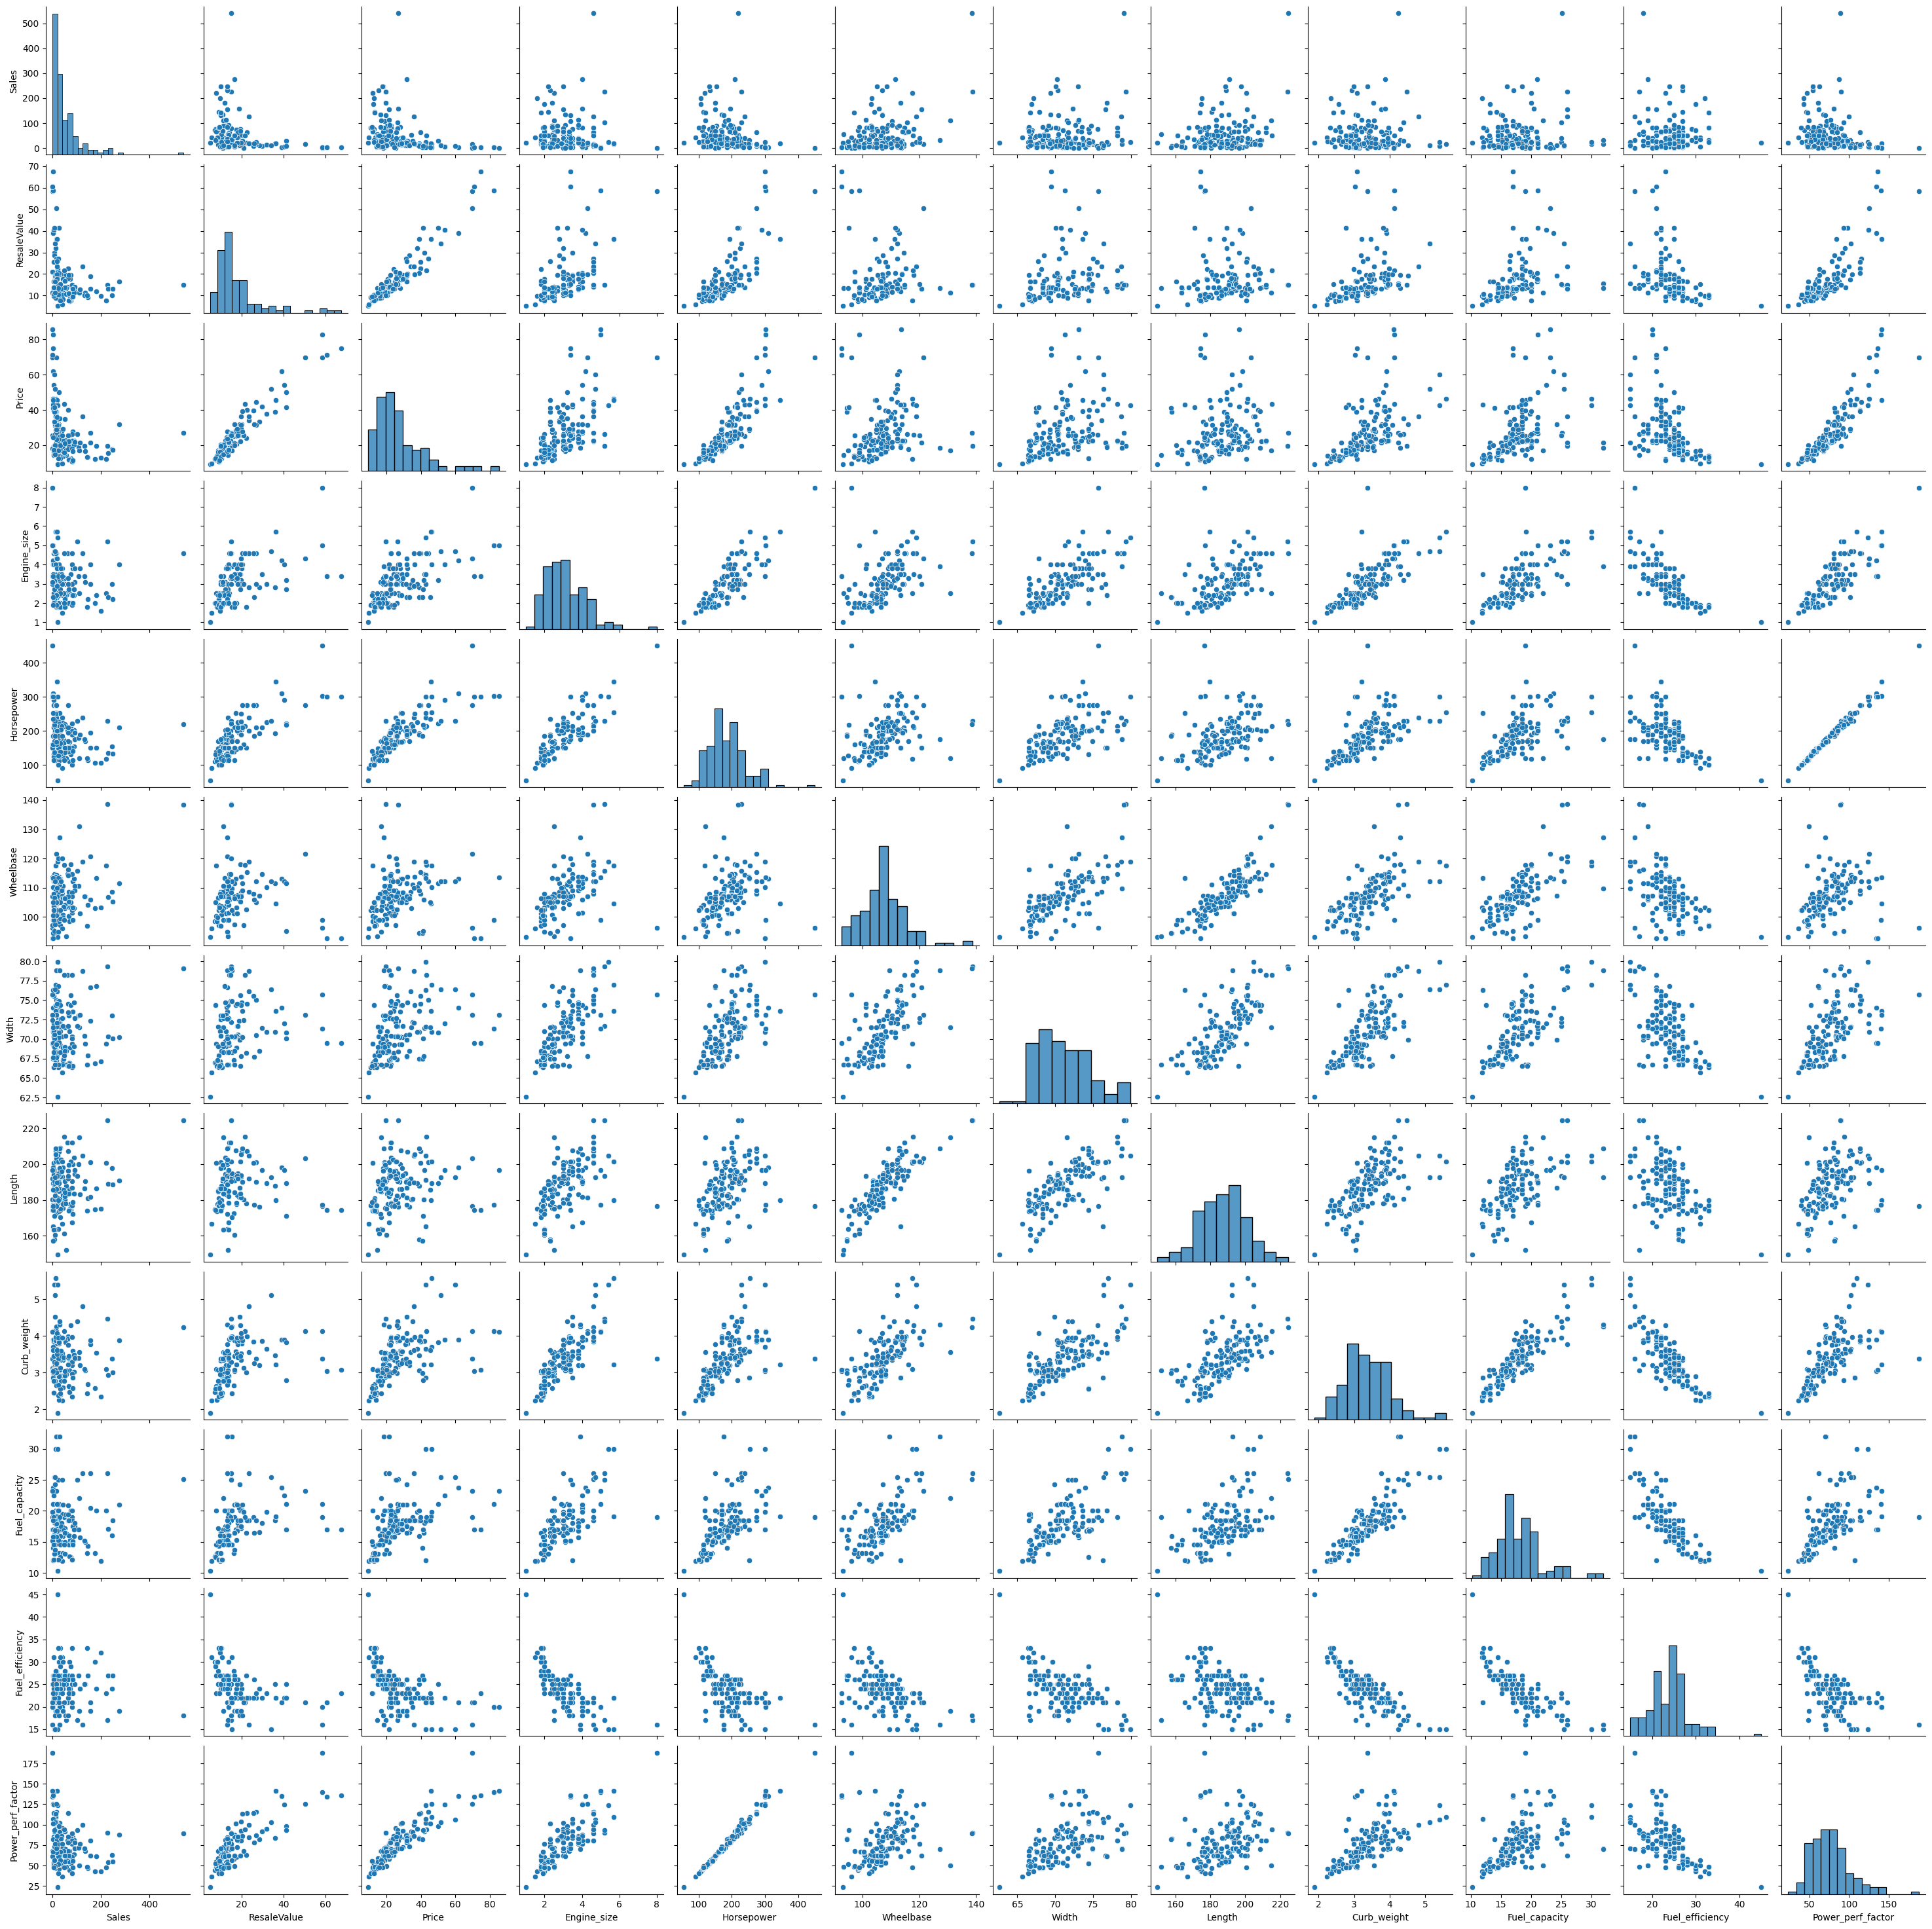

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nur numerische Spalten auswählen
numeric_df = df.select_dtypes(include=["float64", "int64"])

# Pairplot erstellen
sns.pairplot(numeric_df)
plt.show()

In [15]:
def diagnose_object_columns(df):
    """
    Prüft alle object-Spalten auf typische Datenprobleme:
    - Leere Strings
    - Whitespace am Anfang/Ende
    - Groß-/Kleinschreibungsvarianten
    - Sonderzeichen
    - Umlaute
    - Platzhalter wie "?" oder "UNK"

    Gibt ein Dictionary mit Spaltennamen und Anzahl der Problemfälle zurück.
    """
    import re
    import pandas as pd

    problems = {}

    object_cols = df.select_dtypes(include='object').columns

    for col in object_cols:
        col_data = df[col].dropna()

        empty = (col_data == '').sum()
        leading_trailing_ws = col_data[col_data != col_data.str.strip()].count()
        question_mark = (col_data == '?').sum()
        unk_like = col_data[col_data.str.upper().isin(['UNK', 'UNKNOWN'])].count()
        umlauts = col_data[col_data.str.contains(r'[äöüÄÖÜß]', regex=True)].count()
        special_chars = col_data[col_data.str.contains(r'[^A-Z0-9 ]', flags=re.IGNORECASE, regex=True)].count()

        total_issues = empty + leading_trailing_ws + question_mark + unk_like + umlauts + special_chars

        if total_issues > 0:
            problems[col] = {
                'Leere Strings': empty,
                'Whitespace außen': leading_trailing_ws,
                '?-Platzhalter': question_mark,
                '"UNK"/"UNKNOWN"': unk_like,
                'Umlaute': umlauts,
                'Sonderzeichen': special_chars,
                'Gesamt': total_issues
            }

    return pd.DataFrame(problems).T.sort_values(by='Gesamt', ascending=False)

diagnose_object_columns(df)

,Leere Strings,Whitespace außen,?-Platzhalter,"""UNK""/""UNKNOWN""",Umlaute,Sonderzeichen,Gesamt
Latest_Launch,0,0,0,0,0,157,157
Model,0,0,0,0,0,12,12
Manufacturer,0,0,0,0,0,9,9


In [16]:
def check_case_inconsistencies(df):
    """
    Findet Spalten mit inkonsistenter Groß-/Kleinschreibung.
    Gibt ein Dictionary mit {Spaltenname: Liste problematischer Wertegruppen} zurück.
    """
    object_cols = df.select_dtypes(include='object').columns
    inconsistencies = {}

    for col in object_cols:
        col_data = df[col].dropna()
        lower_map = col_data.groupby(col_data.str.lower()).nunique()

        # Wenn zu einer lower-case-Version mehrere Varianten gehören, ist es inkonsistent
        inconsistent = lower_map[lower_map > 1]
        if not inconsistent.empty:
            values = {}
            for key in inconsistent.index:
                variants = col_data[col_data.str.lower() == key].unique().tolist()
                values[key] = variants
            inconsistencies[col] = values

    return inconsistencies

check_case_inconsistencies(df)

{}

In [17]:
df.head()

,Manufacturer,Model,Sales,ResaleValue,Vehicle_type,Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Zielvariable
y = df['Sales']

# Features
X = df.drop(columns=['Sales'])

# Train-Test-Split (80/20)
X_train_sales, X_test_sales, y_train_sales, y_test_sales = train_test_split(X, y, test_size=0.2, random_state=42)

# Shapes prüfen
print("Train Features:", X_train_sales.shape)
print("Test Features:", X_test_sales.shape)
print("Train Target:", y_train_sales.shape)
print("Test Target:", y_test_sales.shape)

Train Features: (125, 15)
Test Features: (32, 15)
Train Target: (125,)
Test Target: (32,)


In [21]:
X_train_sales.head()

,Manufacturer,Model,ResaleValue,Vehicle_type,Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
136,Toyota,Corolla,10.025,Passenger,13.108,1.8,120.0,97.0,66.7,174.0,2.420,13.2,33.0,4/11/2011,47.968972
55,Ford,Ranger,7.850,Car,12.050,2.5,119.0,117.5,69.4,200.7,3.086,20.0,23.0,1/14/2012,47.389531
124,Porsche,Boxter,41.250,Passenger,41.430,2.7,217.0,95.2,70.1,171.0,2.778,17.0,22.0,2/19/2012,93.437331
84,Mitsubishi,Montero,19.125,Car,31.807,3.5,200.0,107.3,69.9,186.6,4.520,24.3,18.0,1/17/2012,83.920815
105,Nissan,Pathfinder,17.810,Car,29.299,3.3,170.0,106.3,71.7,182.6,3.947,21.0,19.0,9/25/2011,72.290355


In [22]:
# Datum in datetime umwandeln
X_train_sales['Latest_Launch'] = pd.to_datetime(X_train_sales['Latest_Launch'], errors='coerce')
X_test_sales['Latest_Launch'] = pd.to_datetime(X_test_sales['Latest_Launch'], errors='coerce')

# Neue Spalten generieren
X_train_sales['Launch_Year'] = X_train_sales['Latest_Launch'].dt.year
X_test_sales['Launch_Year'] = X_test_sales['Latest_Launch'].dt.year

X_train_sales['Launch_Month'] = X_train_sales['Latest_Launch'].dt.month
X_test_sales['Launch_Month'] = X_test_sales['Latest_Launch'].dt.month

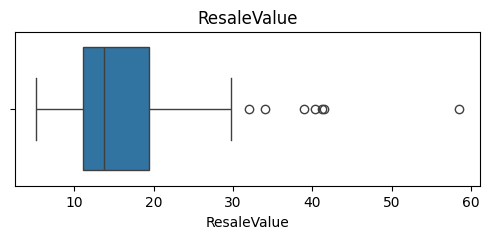

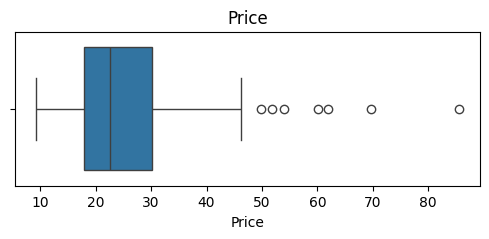

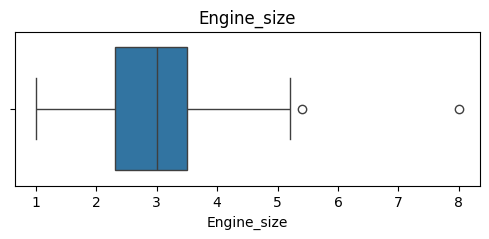

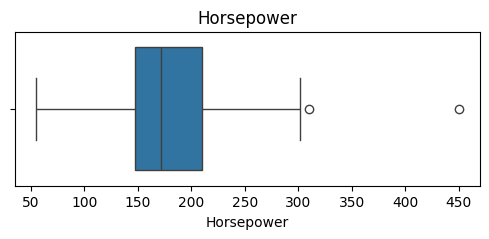

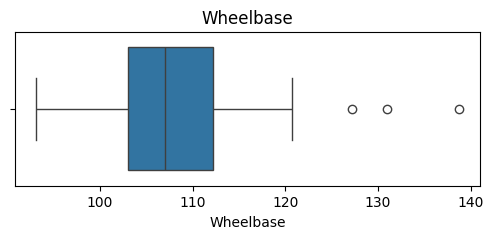

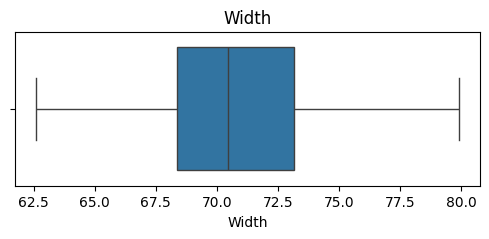

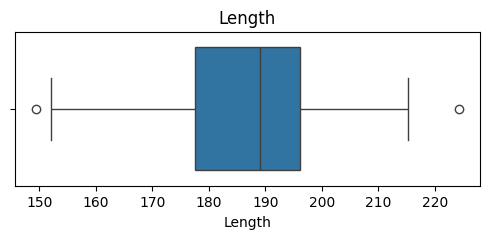

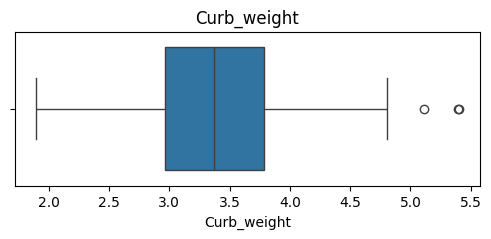

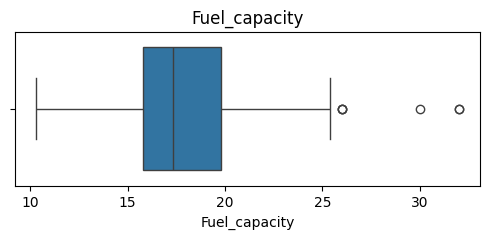

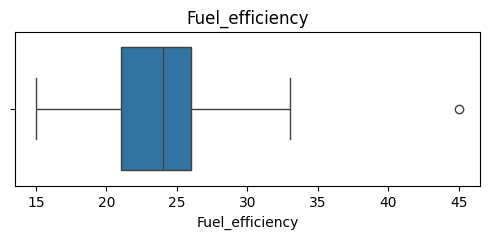

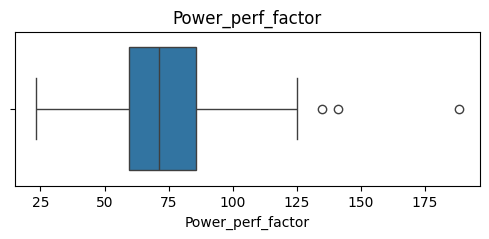

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Separate numeric and categorical columns
numeric_cols = X_train_sales.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_train_sales.select_dtypes(include=['object', 'category']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=X_train_sales[col])
    plt.title(col)
    plt.show()

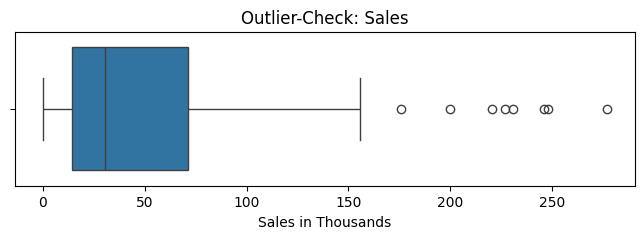

count    125.000000
mean      52.051120
std       57.482172
min        0.110000
25%       14.351000
50%       30.696000
75%       71.186000
max      276.747000
Name: Sales, dtype: float64


In [26]:
# Boxplot zur visuellen Erkennung von Ausreißern
plt.figure(figsize=(8, 2))
sns.boxplot(x=y_train_sales)
plt.title("Outlier-Check: Sales")
plt.xlabel("Sales in Thousands")
plt.show()

# Statistische Kennzahlen
print(y_train_sales.describe())

In [28]:
# Check data types of all columns
print(X_train_sales.dtypes)

Manufacturer                 object
Model                        object
ResaleValue                 float64
Vehicle_type                 object
Price                       float64
Engine_size                 float64
Horsepower                  float64
Wheelbase                   float64
Width                       float64
Length                      float64
Curb_weight                 float64
Fuel_capacity               float64
Fuel_efficiency             float64
Latest_Launch        datetime64[ns]
Power_perf_factor           float64
Launch_Year                   int32
Launch_Month                  int32
dtype: object


In [27]:
# Group by type
print(X_train_sales.dtypes.value_counts())

float64           11
object             3
int32              2
datetime64[ns]     1
Name: count, dtype: int64


In [29]:
X_train_sales['Vehicle_type'] = X_train_sales['Vehicle_type'].astype('category')
X_test_sales['Vehicle_type'] = X_test_sales['Vehicle_type'].astype('category')

In [30]:
# Check data types of all columns
print(X_train_sales.dtypes)

Manufacturer                 object
Model                        object
ResaleValue                 float64
Vehicle_type               category
Price                       float64
Engine_size                 float64
Horsepower                  float64
Wheelbase                   float64
Width                       float64
Length                      float64
Curb_weight                 float64
Fuel_capacity               float64
Fuel_efficiency             float64
Latest_Launch        datetime64[ns]
Power_perf_factor           float64
Launch_Year                   int32
Launch_Month                  int32
dtype: object


In [31]:
X_train_sales['Manufacturer'] = X_train_sales['Manufacturer'].astype('category')
X_test_sales['Manufacturer'] = X_test_sales['Manufacturer'].astype('category')
X_train_sales['Model'] = X_train_sales['Model'].astype('category')
X_test_sales['Model'] = X_test_sales['Model'].astype('category')

# Check data types of all columns
print(X_train_sales.dtypes)

Manufacturer               category
Model                      category
ResaleValue                 float64
Vehicle_type               category
Price                       float64
Engine_size                 float64
Horsepower                  float64
Wheelbase                   float64
Width                       float64
Length                      float64
Curb_weight                 float64
Fuel_capacity               float64
Fuel_efficiency             float64
Latest_Launch        datetime64[ns]
Power_perf_factor           float64
Launch_Year                   int32
Launch_Month                  int32
dtype: object


DATA IMPUTATION

In [32]:
X_train_sales.isnull().sum()


Manufacturer          0
Model                 0
ResaleValue          28
Vehicle_type          0
Price                 2
Engine_size           1
Horsepower            1
Wheelbase             1
Width                 1
Length                1
Curb_weight           1
Fuel_capacity         1
Fuel_efficiency       3
Latest_Launch         0
Power_perf_factor     2
Launch_Year           0
Launch_Month          0
dtype: int64

In [33]:
numeric_cols = X_train_sales.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_train_sales.select_dtypes(include=['category', 'object']).columns

from sklearn.impute import SimpleImputer

# Numeric imputer (robust against outliers)
num_imputer = SimpleImputer(strategy='median')
X_train_sales[numeric_cols] = num_imputer.fit_transform(X_train_sales[numeric_cols])
X_test_sales[numeric_cols] = num_imputer.transform(X_test_sales[numeric_cols])

# Categorical imputer (most frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train_sales[categorical_cols] = cat_imputer.fit_transform(X_train_sales[categorical_cols])
X_test_sales[categorical_cols] = cat_imputer.transform(X_test_sales[categorical_cols])

print("Train missing values:\n", X_train_sales.isnull().sum())
print("\nTest missing values:\n", X_test_sales.isnull().sum())

Train missing values:
 Manufacturer         0
Model                0
ResaleValue          0
Vehicle_type         0
Price                0
Engine_size          0
Horsepower           0
Wheelbase            0
Width                0
Length               0
Curb_weight          0
Fuel_capacity        0
Fuel_efficiency      0
Latest_Launch        0
Power_perf_factor    0
Launch_Year          0
Launch_Month         0
dtype: int64

Test missing values:
 Manufacturer         0
Model                0
ResaleValue          0
Vehicle_type         0
Price                0
Engine_size          0
Horsepower           0
Wheelbase            0
Width                0
Length               0
Curb_weight          0
Fuel_capacity        0
Fuel_efficiency      0
Latest_Launch        0
Power_perf_factor    0
Launch_Year          0
Launch_Month         0
dtype: int64


In [45]:
from scipy.stats import zscore
import numpy as np

# Select numeric columns
numeric_cols = X_train_sales.select_dtypes(include=['float64', 'int64']).columns

# Calculate Z-scores for numeric data
z_scores = zscore(X_train_sales[numeric_cols])

# Build DataFrame for z-scores
z_df = pd.DataFrame(z_scores, columns=numeric_cols, index=X_train_sales.index)

# Create mask: any value in row has z-score > 3
outlier_mask = (np.abs(z_df) > 3).any(axis=1)

# Count of outlier rows
num_outliers = outlier_mask.sum()
total_rows = len(X_train_sales)
remaining_rows = total_rows - num_outliers

print(f"❌ Outlier rows to be removed: {num_outliers}")
print(f"✅ Remaining rows after removal: {remaining_rows}")
print(f"📊 Total rows in training set: {total_rows}")

❌ Outlier rows to be removed: 12
✅ Remaining rows after removal: 113
📊 Total rows in training set: 125


In [44]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# 1. Select numeric columns
numeric_cols = X_train_sales.select_dtypes(include=['float64', 'int64']).columns

# 2. Compute Z-scores
z_scores = zscore(X_train_sales[numeric_cols])
z_df = pd.DataFrame(z_scores, columns=numeric_cols, index=X_train_sales.index)

# 3. Outlier mask (z > 3 or z < -3)
outlier_mask = (np.abs(z_df) > 3).any(axis=1)

# 4. Extract:
outlier_values = X_train_sales[numeric_cols][outlier_mask]
outlier_zscores = z_df[outlier_mask]

# 5. Only show actual outlier z-values (set others to NaN for clarity)
highlighted_zscores = outlier_zscores.where(np.abs(outlier_zscores) > 3)

# 6. Combine for inspection
detailed_outliers = pd.concat([
    outlier_values,
    highlighted_zscores.add_suffix(" (z-score)")
], axis=1)

# 7. Add target column
detailed_outliers['Sales_in_thousands'] = y_train_sales[outlier_mask].values

# 8. Show result
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(detailed_outliers)

,ResaleValue,Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,ResaleValue (z-score),Price (z-score),Engine_size (z-score),Horsepower (z-score),Wheelbase (z-score),Width (z-score),Length (z-score),Curb_weight (z-score),Fuel_capacity (z-score),Fuel_efficiency (z-score),Power_perf_factor (z-score),Sales_in_thousands
124,41.250,41.430,2.7,217.0,95.2,70.1,171.0,2.778,17.0,22.0,93.437331,3.256433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.982
42,13.425,18.575,3.9,175.0,127.2,78.8,208.5,4.298,32.0,16.0,70.078322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.532651,NaN,NaN,31.038
26,5.160,9.235,1.0,55.0,93.1,62.6,149.4,1.895,10.3,45.0,23.276272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.737462,NaN,21.855
78,13.790,42.660,5.4,300.0,119.0,79.9,204.8,5.393,30.0,15.0,123.972047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.211549,3.029353,NaN,NaN,22.925
41,15.510,21.315,3.9,175.0,109.6,78.8,192.6,4.245,32.0,15.0,71.135292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.532651,NaN,NaN,16.767
40,15.060,19.460,5.2,230.0,138.7,79.3,224.2,4.470,26.0,17.0,90.211700,NaN,NaN,NaN,NaN,4.286946,NaN,NaN,NaN,NaN,NaN,NaN,227.061
39,58.470,69.725,8.0,450.0,96.2,75.7,176.7,3.375,19.0,16.0,188.144323,5.469914,3.552162,4.890669,4.940822,NaN,NaN,NaN,NaN,NaN,NaN,4.815071,0.916
73,40.375,54.005,4.0,290.0,112.2,72.0,196.7,3.890,22.5,22.0,124.446716,3.143960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.375
93,41.450,49.900,3.2,221.0,111.5,70.8,189.4,3.823,21.1,25.0,98.249737,3.282142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.602
43,11.260,16.980,2.5,120.0,131.0,71.5,215.0,3.557,22.0,19.0,49.645002,NaN,NaN,NaN,NaN,3.227741,NaN,NaN,NaN,NaN,NaN,NaN,111.313


In [46]:
from scipy.stats import zscore
import numpy as np

# Compute z-scores for target variable
y_z = zscore(y_train_sales)

# Mask: rows where target value is an outlier (z > 3 or z < -3)
y_outlier_mask = np.abs(y_z) > 3

# Count and show
num_y_outliers = y_outlier_mask.sum()
total_y = len(y_train_sales)

print(f"❌ Outliers in y_train_sales: {num_y_outliers}")
print(f"📊 Percentage of y outliers: {100 * num_y_outliers / total_y:.2f}%")

❌ Outliers in y_train_sales: 5
📊 Percentage of y outliers: 4.00%


In [47]:
from scipy.stats import zscore
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_cols = X_train_sales.select_dtypes(include=['float64', 'int64']).columns

# Compute Z-scores
z_scores = zscore(X_train_sales[numeric_cols])
z_df = pd.DataFrame(z_scores, columns=numeric_cols, index=X_train_sales.index)

# Outlier mask: any value in row has |z| > 3
x_outlier_mask = (np.abs(z_df) > 3).any(axis=1)

# Count
num_x_outliers = x_outlier_mask.sum()
total_x = len(X_train_sales)

print(f"❌ Outlier rows in X_train_sales: {num_x_outliers}")
print(f"📊 Percentage of X outliers: {100 * num_x_outliers / total_x:.2f}%")

❌ Outlier rows in X_train_sales: 12
📊 Percentage of X outliers: 9.60%


In [48]:
from scipy.stats import zscore
import numpy as np

# Get numeric columns from X
numeric_cols = X_train_sales.select_dtypes(include=['float64', 'int64']).columns

# Compute z-scores for X
z_scores_X = zscore(X_train_sales[numeric_cols])
z_df_X = pd.DataFrame(z_scores_X, columns=numeric_cols, index=X_train_sales.index)

# Create outlier mask for X: any value in row > 3 std deviations
x_outlier_mask = (np.abs(z_df_X) > 3).any(axis=1)

# Compute z-scores for y
z_scores_y = zscore(y_train_sales)
y_outlier_mask = np.abs(z_scores_y) > 3

# Combine both masks: mark row as outlier if it's one in X or y
combined_outlier_mask = x_outlier_mask | y_outlier_mask

# Remove those rows from both X and y
X_train_clean = X_train_sales[~combined_outlier_mask].reset_index(drop=True)
y_train_clean = y_train_sales[~combined_outlier_mask].reset_index(drop=True)

# Report result
print(f"✅ Cleaned training set:")
print(f"Original size: {len(X_train_sales)} rows")
print(f"Removed outliers: {combined_outlier_mask.sum()} rows")
print(f"Remaining rows: {len(X_train_clean)}")

✅ Cleaned training set:
Original size: 125 rows
Removed outliers: 16 rows
Remaining rows: 109


In [49]:
# List all columns in the current dataset
print("🧾 Current feature columns in X_train_clean:")
print(X_train_clean.columns.tolist())

🧾 Current feature columns in X_train_clean:
['Manufacturer', 'Model', 'ResaleValue', 'Vehicle_type', 'Price', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor', 'Launch_Year', 'Launch_Month']


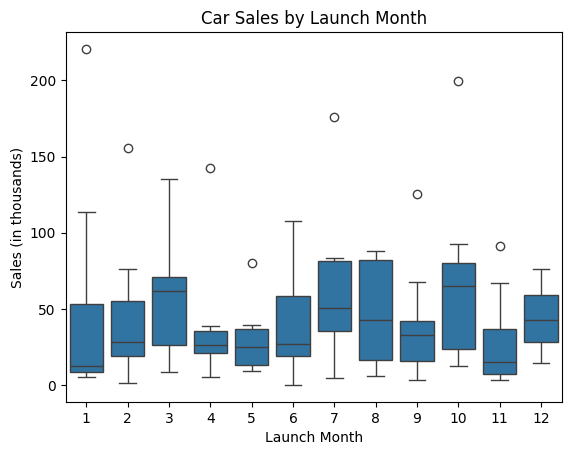

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: boxplot of sales per month
sns.boxplot(x=X_train_clean['Launch_Month'], y=y_train_clean)
plt.title("Car Sales by Launch Month")
plt.xlabel("Launch Month")
plt.ylabel("Sales (in thousands)")
plt.show()

Markenstärke herausfinden. Wie stark beeinflusst die Marke Sales?

In [54]:
brand_sales = pd.DataFrame({
    'Mean_Sales': df.groupby('Manufacturer')['Sales'].mean().sort_values(ascending=False)
})



display(brand_sales)

,Mean_Sales
Manufacturer,
Ford,183.875909
Honda,118.534800
Jeep,97.717667
Dodge,82.740818
Toyota,82.245000
Pontiac,61.755667
Chevrolet,61.596111
Buick,60.504750
Nissan,57.090714


Variable Unaided Brand Awareness hinzufügen.

In [55]:
brand_awareness = {
    'Ford': 85, 'Chevrolet': 82, 'Toyota': 80, 'Honda': 75, 'BMW': 68,
    'Mercedes-B': 65, 'Jeep': 60, 'Nissan': 55, 'Hyundai': 50, 'Volkswagen': 45,
    'Lexus': 42, 'Dodge': 40, 'Subaru': 38, 'Audi': 35, 'Cadillac': 32,
    'Chrysler': 30, 'Acura': 28, 'Infiniti': 25, 'Mitsubishi': 22,
    'Buick': 20, 'Lincoln': 18, 'Volvo': 17, 'Jaguar': 15, 'Saturn': 12,
    'Pontiac': 10, 'Oldsmobile': 8, 'Saab': 7, 'Plymouth': 6, 'Porsche': 25
}

# Klassifizierung in vier Gruppen
def categorize_awareness(score):
    if score >= 75:
        return 'Very High'
    elif score >= 50:
        return 'High'
    elif score >= 25:
        return 'Medium'
    else:
        return 'Low'

# Mapping auf X_train_clean
X_train_clean['Brand_Awareness_Score'] = X_train_clean['Manufacturer'].map(brand_awareness)
X_train_clean['Brand_Awareness_Level'] = X_train_clean['Brand_Awareness_Score'].apply(categorize_awareness)

# Mapping auf X_test_sales
X_test_sales['Brand_Awareness_Score'] = X_test_sales['Manufacturer'].map(brand_awareness)
X_test_sales['Brand_Awareness_Level'] = X_test_sales['Brand_Awareness_Score'].apply(categorize_awareness)

Spalten, die nicht gebrauch werden löschen.

In [56]:
# Spalten, die entfernt werden sollen
columns_to_drop = ['Manufacturer', 'Model', 'ResaleValue', 'Latest_Launch', 'Launch_Year']

# Neue DataFrames mit bereinigten Spalten
X_train_ready = X_train_clean.drop(columns=columns_to_drop).copy()
X_test_ready = X_test_sales.drop(columns=columns_to_drop).copy()

Nochmal Data Types checken


In [57]:
# Datentypen im Trainingsdatensatz
print("Datentypen in X_train_ready:")
print(X_train_ready.dtypes)
print("\n")

# Datentypen im Testdatensatz
print("Datentypen in X_test_ready:")
print(X_test_ready.dtypes)

Datentypen in X_train_ready:
Vehicle_type              object
Price                    float64
Engine_size              float64
Horsepower               float64
Wheelbase                float64
Width                    float64
Length                   float64
Curb_weight              float64
Fuel_capacity            float64
Fuel_efficiency          float64
Power_perf_factor        float64
Launch_Month               int32
Brand_Awareness_Score    float64
Brand_Awareness_Level     object
dtype: object


Datentypen in X_test_ready:
Vehicle_type              object
Price                    float64
Engine_size              float64
Horsepower               float64
Wheelbase                float64
Width                    float64
Length                   float64
Curb_weight              float64
Fuel_capacity            float64
Fuel_efficiency          float64
Power_perf_factor        float64
Launch_Month               int32
Brand_Awareness_Score      int64
Brand_Awareness_Level     object
dty

In [58]:
# Liste der Spalten, die in Kategorie umgewandelt werden sollen
cat_cols = ['Vehicle_type', 'Brand_Awareness_Level']

# Für Trainingsdaten
for col in cat_cols:
    X_train_ready[col] = X_train_ready[col].astype('category')

# Für Testdaten
for col in cat_cols:
    X_test_ready[col] = X_test_ready[col].astype('category')

In [59]:
# Datentypen im Trainingsdatensatz
print("Datentypen in X_train_ready:")
print(X_train_ready.dtypes)
print("\n")

# Datentypen im Testdatensatz
print("Datentypen in X_test_ready:")
print(X_test_ready.dtypes)

Datentypen in X_train_ready:
Vehicle_type             category
Price                     float64
Engine_size               float64
Horsepower                float64
Wheelbase                 float64
Width                     float64
Length                    float64
Curb_weight               float64
Fuel_capacity             float64
Fuel_efficiency           float64
Power_perf_factor         float64
Launch_Month                int32
Brand_Awareness_Score     float64
Brand_Awareness_Level    category
dtype: object


Datentypen in X_test_ready:
Vehicle_type             category
Price                     float64
Engine_size               float64
Horsepower                float64
Wheelbase                 float64
Width                     float64
Length                    float64
Curb_weight               float64
Fuel_capacity             float64
Fuel_efficiency           float64
Power_perf_factor         float64
Launch_Month                int32
Brand_Awareness_Score       int64
Brand_Awa

In [60]:
# Funktion zum Mapping des Monats auf Jahreszeiten
def map_month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Neue Kategorie-Spalte für beide DataFrames
X_train_ready['Launch_Season'] = X_train_ready['Launch_Month'].apply(map_month_to_season)
X_test_ready['Launch_Season'] = X_test_ready['Launch_Month'].apply(map_month_to_season)

# Optional: Alte Monats-Spalte entfernen
X_train_ready.drop(columns=['Launch_Month'], inplace=True)
X_test_ready.drop(columns=['Launch_Month'], inplace=True)

# Datentyp als Kategorie setzen
X_train_ready['Launch_Season'] = X_train_ready['Launch_Season'].astype('category')
X_test_ready['Launch_Season'] = X_test_ready['Launch_Season'].astype('category')

In [61]:
# Datentypen im Trainingsdatensatz
print("Datentypen in X_train_ready:")
print(X_train_ready.dtypes)
print("\n")

# Datentypen im Testdatensatz
print("Datentypen in X_test_ready:")
print(X_test_ready.dtypes)

Datentypen in X_train_ready:
Vehicle_type             category
Price                     float64
Engine_size               float64
Horsepower                float64
Wheelbase                 float64
Width                     float64
Length                    float64
Curb_weight               float64
Fuel_capacity             float64
Fuel_efficiency           float64
Power_perf_factor         float64
Brand_Awareness_Score     float64
Brand_Awareness_Level    category
Launch_Season            category
dtype: object


Datentypen in X_test_ready:
Vehicle_type             category
Price                     float64
Engine_size               float64
Horsepower                float64
Wheelbase                 float64
Width                     float64
Length                    float64
Curb_weight               float64
Fuel_capacity             float64
Fuel_efficiency           float64
Power_perf_factor         float64
Brand_Awareness_Score       int64
Brand_Awareness_Level    category
Launch_Se

In [62]:
print("🟩 Vorschau auf X_train_ready:")
display(X_train_ready.head())

print("\n🟦 Vorschau auf X_test_ready:")
display(X_test_ready.head())

🟩 Vorschau auf X_train_ready:


,Vehicle_type,Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Brand_Awareness_Score,Brand_Awareness_Level,Launch_Season
0,Passenger,13.108,1.8,120.0,97.0,66.7,174.0,2.420,13.2,33.0,47.968972,80.0,Very High,Spring
1,Car,12.050,2.5,119.0,117.5,69.4,200.7,3.086,20.0,23.0,47.389531,85.0,Very High,Winter
2,Car,31.807,3.5,200.0,107.3,69.9,186.6,4.520,24.3,18.0,83.920815,22.0,Low,Winter
3,Car,29.299,3.3,170.0,106.3,71.7,182.6,3.947,21.0,19.0,72.290355,55.0,High,Fall
4,Car,14.460,2.5,120.0,93.4,66.7,152.0,3.045,19.0,17.0,48.672898,60.0,High,Spring



🟦 Vorschau auf X_test_ready:


,Vehicle_type,Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Brand_Awareness_Score,Brand_Awareness_Level,Launch_Season
126,Passenger,74.970,3.4,300.0,92.6,69.5,174.5,3.075,17.0,23.0,135.914710,25,Medium,Summer
45,Car,19.565,2.4,150.0,113.3,76.8,186.3,3.533,20.0,24.0,61.227000,40,Medium,Fall
133,Passenger,15.010,2.2,137.0,106.5,69.0,190.4,2.910,13.1,28.0,54.819728,12,Low,Winter
138,Passenger,25.545,3.0,210.0,107.1,71.7,191.9,3.417,18.5,26.0,84.911898,80,Very High,Summer
111,Passenger,36.229,4.0,250.0,113.8,74.4,205.4,3.967,18.5,22.0,103.441693,8,Low,Winter


In [63]:
X_train_ready = X_train_ready.drop(columns=['Brand_Awareness_Score'])
X_test_ready = X_test_ready.drop(columns=['Brand_Awareness_Score'])

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Kategorische und numerische Spalten
categorical_features = ['Vehicle_type', 'Brand_Awareness_Level', 'Launch_Season']
numerical_features = [col for col in X_train_ready.columns if col not in categorical_features]

# ColumnTransformer definieren
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)
# Fit the preprocessor
preprocessor.fit(X_train_ready)

# ░░░ Schritt 1: Hole die Namen der One-Hot-Features
ohe = preprocessor.named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

# ░░░ Schritt 2: Kombiniere mit numerischen Features
feature_names = list(ohe_feature_names) + numerical_features
# Transformiere deine Daten wie gehabt
X_train_processed = preprocessor.transform(X_train_ready)
X_test_processed = preprocessor.transform(X_test_ready)

# Wiederherstellen als DataFrame mit richtigen Spaltennamen
import pandas as pd

X_train_final = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train_ready.index)
X_test_final = pd.DataFrame(X_test_processed, columns=feature_names, index=X_test_ready.index)

In [66]:
print("🟩 Vorschau auf X_train_ready:")
display(X_train_final.head())

print("\n🟦 Vorschau auf X_test_ready:")
display(X_test_final.head())

🟩 Vorschau auf X_train_ready:


,Vehicle_type_Passenger,Brand_Awareness_Level_Low,Brand_Awareness_Level_Medium,Brand_Awareness_Level_Very High,Launch_Season_Spring,Launch_Season_Summer,Launch_Season_Winter,Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.187113,-1.307913,-1.254664,-1.650765,-1.273009,-1.036444,-1.594042,-1.293889,2.343292,-1.273668
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.299820,-0.475605,-1.276842,1.773357,-0.420862,1.184082,-0.401369,0.821542,-0.331251,-1.303865
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.804853,0.713407,0.519547,0.069647,-0.263057,0.011445,2.166638,2.159241,-1.668522,0.599931
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.537681,0.475605,-0.145782,-0.097383,0.305042,-0.321218,1.140510,1.132635,-1.401068,-0.006180
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.043088,-0.475605,-1.254664,-2.252075,-1.273009,-2.866091,-0.474792,0.510449,-1.935976,-1.236984



🟦 Vorschau auf X_test_ready:


,Vehicle_type_Passenger,Brand_Awareness_Level_Low,Brand_Awareness_Level_Medium,Brand_Awareness_Level_Very High,Launch_Season_Spring,Launch_Season_Summer,Launch_Season_Winter,Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
126,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.402919,0.594506,2.737310,-2.385699,-0.389301,-0.994861,-0.421068,-0.111737,-0.331251,3.309549
45,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.499262,-0.594506,-0.589335,1.071829,1.914653,-0.013505,0.399118,0.821542,-0.063796,-0.582737
133,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.984497,-0.832308,-0.877644,-0.063977,-0.547106,0.327475,-0.716550,-1.324998,1.006021,-0.916647
138,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.137775,0.118901,0.741323,0.036241,0.305042,0.452223,0.191386,0.354903,0.471112,0.651581
111,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.275920,1.307913,1.628428,1.155344,1.157189,1.574961,1.176326,0.354903,-0.598705,1.617245


In [67]:
print("Train Features:", X_train_final.shape)
print("Test Features:", X_test_final.shape)
print("Train Target:", y_train_clean.shape)
print("Test Target:", y_test_sales.shape)

Train Features: (109, 17)
Test Features: (32, 17)
Train Target: (109,)
Test Target: (32,)


Baseline Model (Linear Regression)

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Modell erstellen
baseline_model = LinearRegression()

# 2. Modell auf den Trainingsdaten trainieren
baseline_model.fit(X_train_final, y_train_clean)

# 3. Vorhersage auf Testdaten
y_pred = baseline_model.predict(X_test_final)

# 4. Auswertung der Modellgüte
mse = mean_squared_error(y_test_sales, y_pred)   # oder y_test_clean, falls du es bereinigt hast
rmse = mse ** 0.5
mae = mean_absolute_error(y_test_sales, y_pred)
r2 = r2_score(y_test_sales, y_pred)

# 5. Ergebnisse anzeigen
print("📊 Baseline Linear Regression Results:")
print(f"➡️ R² Score: {r2:.3f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE:  {mae:.2f}")

📊 Baseline Linear Regression Results:
➡️ R² Score: 0.302
📉 RMSE: 82.45
📉 MAE:  49.63


In [69]:
# Koefﬁzienten und zugehörige Spaltennamen abrufen
coefficients = baseline_model.coef_
features = X_train_final.columns

# In DataFrame packen und sortieren
import pandas as pd

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Absoluten Einfluss sortieren (damit + und – gleich behandelt werden)
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Anzeigen
print(coef_df_sorted[['Feature', 'Coefficient']])

                            Feature  Coefficient
9                        Horsepower   -39.601891
3   Brand_Awareness_Level_Very High    29.256128
16                Power_perf_factor    25.934553
8                       Engine_size    24.815058
1         Brand_Awareness_Level_Low   -24.091642
10                        Wheelbase    22.707321
7                             Price   -19.434096
0            Vehicle_type_Passenger    14.039317
13                      Curb_weight   -13.194216
4              Launch_Season_Spring   -12.859439
14                    Fuel_capacity     6.555913
12                           Length    -5.769114
5              Launch_Season_Summer    -5.488374
2      Brand_Awareness_Level_Medium    -5.273547
6              Launch_Season_Winter    -3.483550
15                  Fuel_efficiency     3.179075
11                            Width    -2.628915


Random Forest Regressor

📊 Random Forest Regression Results:
➡️ R² Score: 0.183
📉 RMSE: 89.19
📉 MAE:  40.31

Top 10 Features by Importance:
                            Feature  Importance
7                             Price    0.241060
3   Brand_Awareness_Level_Very High    0.163612
16                Power_perf_factor    0.124453
10                        Wheelbase    0.109239
14                    Fuel_capacity    0.064161
12                           Length    0.050159
8                       Engine_size    0.047302
9                        Horsepower    0.043907
11                            Width    0.039108
13                      Curb_weight    0.038553


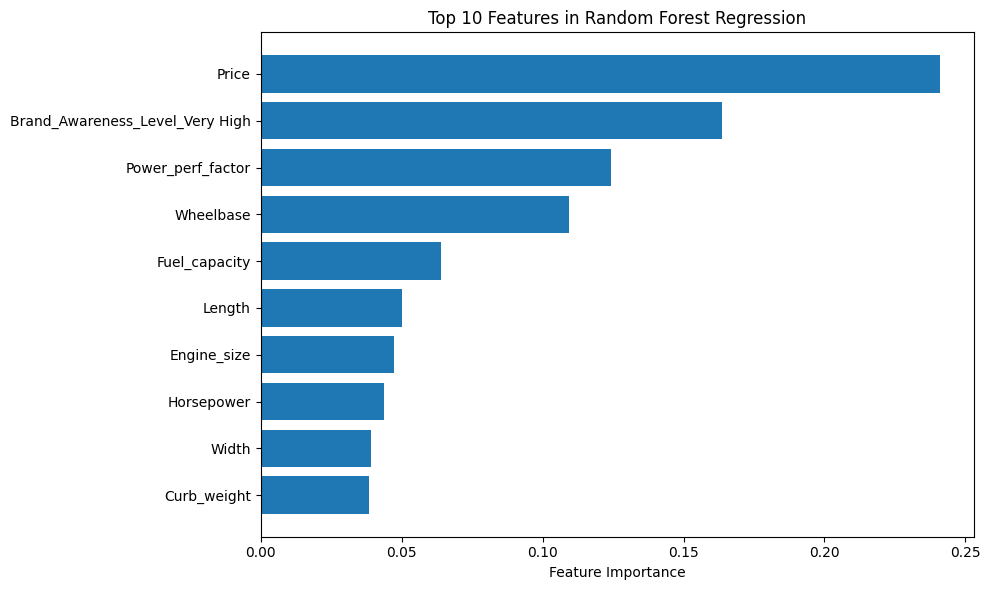

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Random Forest Modell initialisieren
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Trainiere das Modell mit den bereinigten Trainingsdaten 
rf_model.fit(X_train_final, y_train_clean)

# 3. Treffe Vorhersagen auf dem Testdatensatz
y_rf_pred = rf_model.predict(X_test_final)

# 4. Berechne Evaluationsmetriken
mse_rf = mean_squared_error(y_test_sales, y_rf_pred)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test_sales, y_rf_pred)
r2_rf = r2_score(y_test_sales, y_rf_pred)

print("📊 Random Forest Regression Results:")
print(f"➡️ R² Score: {r2_rf:.3f}")
print(f"📉 RMSE: {rmse_rf:.2f}")
print(f"📉 MAE:  {mae_rf:.2f}")

# 5. Bestimme die Feature-Importances aus dem Random Forest
importance = rf_model.feature_importances_
feature_names = X_train_final.columns.tolist()

# Erstelle ein DataFrame zur besseren Übersicht
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Features by Importance:")
print(importance_df.head(10))

# 6. Plot der Top-10 Features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].head(10), importance_df['Importance'].head(10))
plt.xlabel("Feature Importance")
plt.title("Top 10 Features in Random Forest Regression")
plt.gca().invert_yaxis()  # Höchste Wichtigkeit oben
plt.tight_layout()
plt.show()

Ridge Regression

📊 Ridge Regression Results:
➡️ R² Score: 0.312
📉 RMSE: 81.88
📉 MAE:  48.14

🔝 Top 10 Ridge Coefficients:
                            Feature  Coefficient
3   Brand_Awareness_Level_Very High    27.757969
1         Brand_Awareness_Level_Low   -23.145662
8                       Engine_size    22.800173
10                        Wheelbase    20.890422
9                        Horsepower   -18.525183
7                             Price   -13.770352
13                      Curb_weight   -13.174324
4              Launch_Season_Spring   -11.569125
0            Vehicle_type_Passenger     9.451336
2      Brand_Awareness_Level_Medium    -6.038001


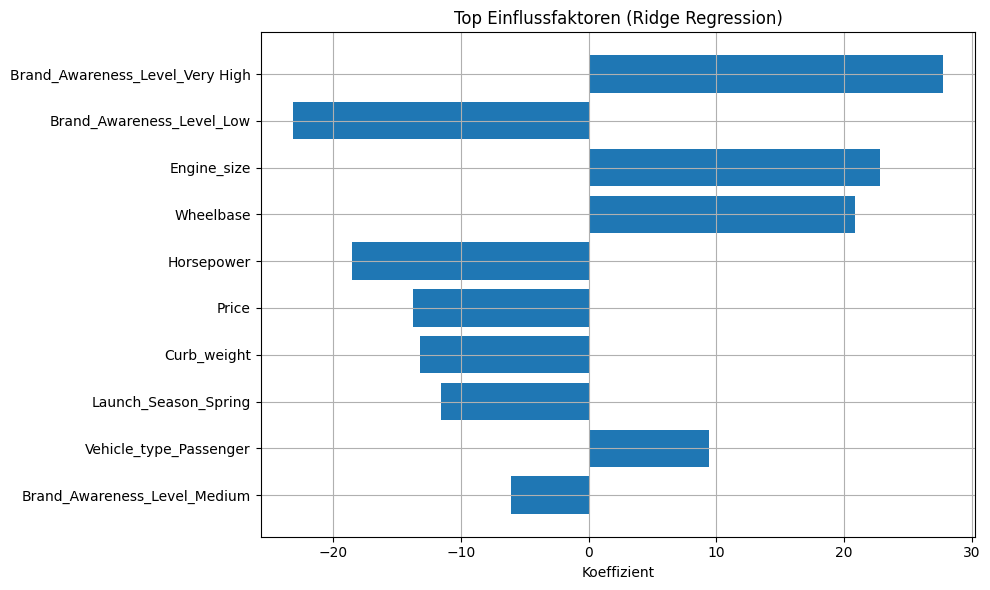

In [71]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Ridge Regression initialisieren (mit Alpha = 1.0)
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_final, y_train_clean)

# 2. Vorhersage auf Testdaten
y_ridge_pred = ridge_model.predict(X_test_final)

# 3. Metriken berechnen
r2_ridge = r2_score(y_test_sales, y_ridge_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_test_sales, y_ridge_pred))
mae_ridge = mean_absolute_error(y_test_sales, y_ridge_pred)

# 4. Ergebnisse anzeigen
print("📊 Ridge Regression Results:")
print(f"➡️ R² Score: {r2_ridge:.3f}")
print(f"📉 RMSE: {rmse_ridge:.2f}")
print(f"📉 MAE:  {mae_ridge:.2f}")

# 5. Koeffizienten analysieren
coefficients = ridge_model.coef_
features = X_train_final.columns

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Top-Koeffizienten anzeigen
print("\n🔝 Top 10 Ridge Coefficients:")
print(coef_df_sorted[['Feature', 'Coefficient']].head(10))

# 6. Visualisierung
plt.figure(figsize=(10, 6))
plt.barh(coef_df_sorted['Feature'][:10][::-1], coef_df_sorted['Coefficient'][:10][::-1])
plt.title('Top Einflussfaktoren (Ridge Regression)')
plt.xlabel('Koeffizient')
plt.grid(True)
plt.tight_layout()
plt.show()

Lasso Regression

📊 Lasso Regression Results:
➡️ R² Score: 0.289
📉 RMSE: 83.21
📉 MAE:  45.31

🔝 Top Lasso Coefficients:
                            Feature  Coefficient
3   Brand_Awareness_Level_Very High    29.898326
7                             Price   -14.864893
10                        Wheelbase    14.778798
1         Brand_Awareness_Level_Low   -13.122369
8                       Engine_size    11.658391
9                        Horsepower    -9.505011
13                      Curb_weight    -6.527842
4              Launch_Season_Spring    -3.825932
0            Vehicle_type_Passenger     0.000000
5              Launch_Season_Summer     0.000000


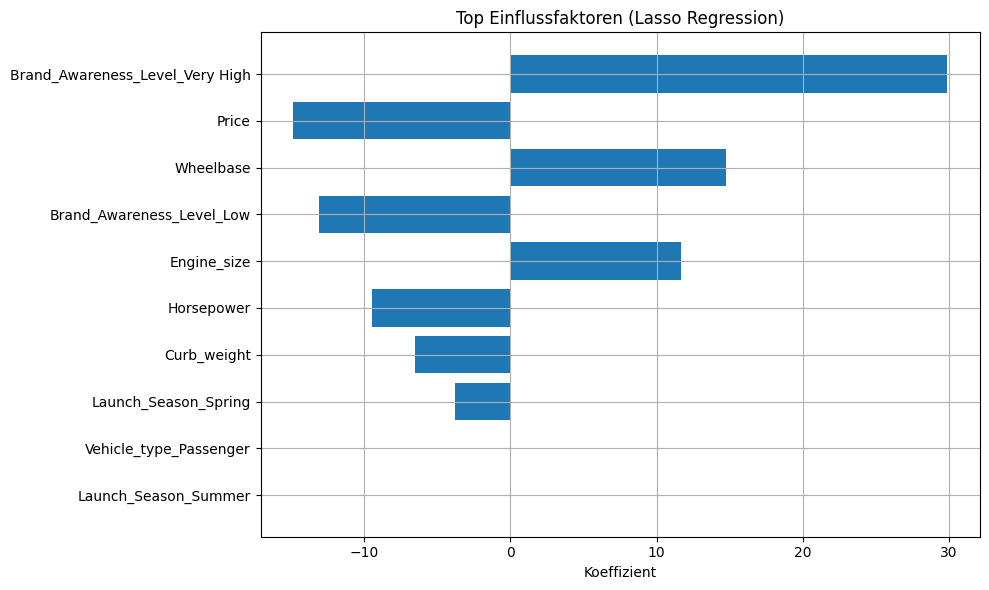

In [72]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Lasso Regression initialisieren (Alpha = 1.0 ist ein guter Start)
lasso_model = Lasso(alpha=1.0, random_state=42)
lasso_model.fit(X_train_final, y_train_clean)

# 2. Vorhersage auf Testdaten
y_lasso_pred = lasso_model.predict(X_test_final)

# 3. Evaluationsmetriken
r2_lasso = r2_score(y_test_sales, y_lasso_pred)
rmse_lasso = np.sqrt(mean_squared_error(y_test_sales, y_lasso_pred))
mae_lasso = mean_absolute_error(y_test_sales, y_lasso_pred)

print("📊 Lasso Regression Results:")
print(f"➡️ R² Score: {r2_lasso:.3f}")
print(f"📉 RMSE: {rmse_lasso:.2f}")
print(f"📉 MAE:  {mae_lasso:.2f}")

# 4. Feature-Koeffizienten analysieren
coefficients = lasso_model.coef_
features = X_train_final.columns

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print("\n🔝 Top Lasso Coefficients:")
print(coef_df_sorted[['Feature', 'Coefficient']].head(10))

# 5. Visualisierung
plt.figure(figsize=(10, 6))
plt.barh(coef_df_sorted['Feature'][:10][::-1], coef_df_sorted['Coefficient'][:10][::-1])
plt.title('Top Einflussfaktoren (Lasso Regression)')
plt.xlabel('Koeffizient')
plt.grid(True)
plt.tight_layout()
plt.show()

Ein schlankes, leistungsfähiges Modell mit den wichtigsten Einflussfaktoren, ausgewählt durch Lasso und optimiert durch RidgeCV.
Schritt 1: Wichtige Features aus Lasso extrahieren

In [73]:
# Nur Features mit nicht-null Koeffizienten aus Lasso behalten
selected_features = coef_df_sorted[coef_df_sorted['Coefficient'] != 0]['Feature'].tolist()

# Neue Trainings- und Testdaten mit nur diesen Features
X_train_selected = X_train_final[selected_features]
X_test_selected = X_test_final[selected_features]

Schritt 2: RidgeCV-Modell trainieren (automatische Alpha-Wahl)

In [74]:
from sklearn.linear_model import RidgeCV

# RidgeCV mit mehreren Alpha-Werten (Regulationsstärken)
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
ridge_cv = RidgeCV(alphas=alphas, cv=5)  # 5-fold-CV zur Alpha-Wahl
ridge_cv.fit(X_train_selected, y_train_clean)

# Vorhersage
y_pred_ridge_cv = ridge_cv.predict(X_test_selected)

# Bewertung
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

r2_ridgecv = r2_score(y_test_sales, y_pred_ridge_cv)
rmse_ridgecv = np.sqrt(mean_squared_error(y_test_sales, y_pred_ridge_cv))
mae_ridgecv = mean_absolute_error(y_test_sales, y_pred_ridge_cv)

print("📊 RidgeCV Results:")
print(f"Best alpha: {ridge_cv.alpha_}")
print(f"➡️ R² Score: {r2_ridgecv:.3f}")
print(f"📉 RMSE: {rmse_ridgecv:.2f}")
print(f"📉 MAE:  {mae_ridgecv:.2f}")

📊 RidgeCV Results:
Best alpha: 10.0
➡️ R² Score: 0.286
📉 RMSE: 83.39
📉 MAE:  44.69


Schritt 3: Einflusstärkste Merkmale zeigen

In [75]:
# Koeffizienten analysieren
ridgecv_coeffs = pd.DataFrame({
    'Feature': X_train_selected.columns,
    'Coefficient': ridge_cv.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("🔝 Top RidgeCV Coefficients:")
print(ridgecv_coeffs.head(10))

🔝 Top RidgeCV Coefficients:
                           Feature  Coefficient
0  Brand_Awareness_Level_Very High    22.727768
2                        Wheelbase    14.804047
3        Brand_Awareness_Level_Low   -14.512755
1                            Price   -14.165572
4                      Engine_size    12.853574
5                       Horsepower   -11.064533
6                      Curb_weight    -7.426794
7             Launch_Season_Spring    -6.028513


Gradient Boosting Regressor

📊 Gradient Boosting Regression Results:
➡️ R² Score: 0.163
📉 RMSE: 90.28
📉 MAE:  42.91

🔝 Top 10 Features by Importance:
                            Feature  Importance
3   Brand_Awareness_Level_Very High    0.231617
7                             Price    0.207771
16                Power_perf_factor    0.177374
10                        Wheelbase    0.101268
11                            Width    0.069440
15                  Fuel_efficiency    0.036343
14                    Fuel_capacity    0.033499
4              Launch_Season_Spring    0.032187
12                           Length    0.028853
8                       Engine_size    0.028810


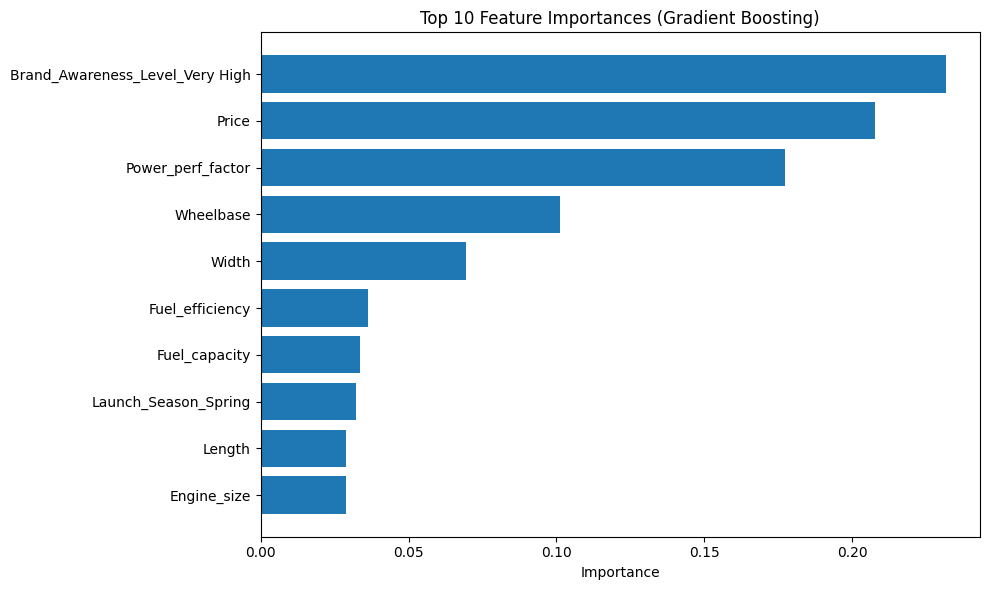

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Modell initialisieren
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)

# Modell trainieren
gb_model.fit(X_train_final, y_train_clean)

# Vorhersage auf dem Testset
y_pred_gb = gb_model.predict(X_test_final)

# Evaluation
r2 = r2_score(y_test_sales, y_pred_gb)
rmse = np.sqrt(mean_squared_error(y_test_sales, y_pred_gb))
mae = mean_absolute_error(y_test_sales, y_pred_gb)

print("📊 Gradient Boosting Regression Results:")
print(f"➡️ R² Score: {r2:.3f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE:  {mae:.2f}")

# 🔝 Feature Importance auslesen
feature_importances = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n🔝 Top 10 Features by Importance:")
print(feature_importances.head(10))

# 📊 Visualisierung der Top Features
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:10][::-1], feature_importances['Importance'][:10][::-1])
plt.title('Top 10 Feature Importances (Gradient Boosting)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

Optimierung mit GridSearchCV für GradientBoostingRegressor

Fitting 5 folds for each of 36 candidates, totalling 180 fits
✅ Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

📊 Tuned Gradient Boosting Results:
➡️ R² Score: 0.186
📉 RMSE: 89.02
📉 MAE:  41.31

🔝 Top 10 Features:
                            Feature  Importance
7                             Price    0.228574
3   Brand_Awareness_Level_Very High    0.178185
16                Power_perf_factor    0.130677
10                        Wheelbase    0.106591
14                    Fuel_capacity    0.062935
12                           Length    0.056450
13                      Curb_weight    0.053493
9                        Horsepower    0.038076
15                  Fuel_efficiency    0.036701
11                            Width    0.034221


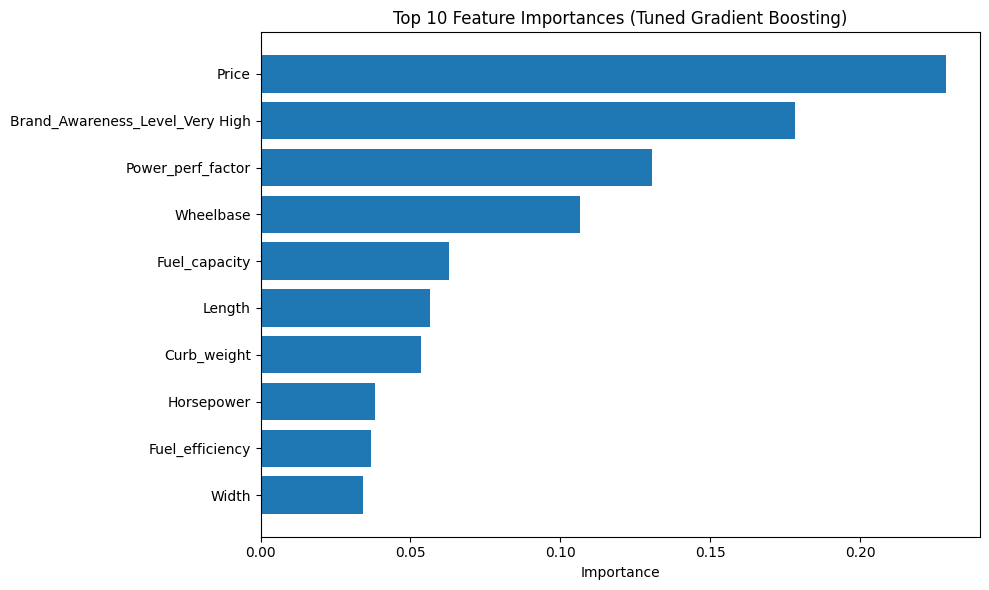

In [81]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# 🔧 Parameter-Raster
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# 🔍 Grid Search Setup
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# 🚀 Fit auf Trainingsdaten
grid_search.fit(X_train_final, y_train_clean)

# 📌 Bestes Modell
best_model = grid_search.best_estimator_
print(f"✅ Best Parameters: {grid_search.best_params_}")

# 🧪 Vorhersage & Evaluation
y_pred = best_model.predict(X_test_final)
r2 = r2_score(y_test_sales, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_sales, y_pred))
mae = mean_absolute_error(y_test_sales, y_pred)

print("\n📊 Tuned Gradient Boosting Results:")
print(f"➡️ R² Score: {r2:.3f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE:  {mae:.2f}")

# 🔝 Feature Importance
import matplotlib.pyplot as plt

feature_importances = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n🔝 Top 10 Features:")
print(feature_importances.head(10))

# 📊 Visualisierung
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:10][::-1], feature_importances['Importance'][:10][::-1])
plt.title('Top 10 Feature Importances (Tuned Gradient Boosting)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()